In [175]:
printmd('UK-based Online Retail Store Customer Segmentation using RFM Model.')
printmd(' ')
printmd('Exploratory Data Analysis, Descriptive Analytics, Cohort Analysis.')
printmd('Fixing Skewness of Asymmetrically Distributed Data with Quantile Transformation.')
printmd(' ')
printmd('RFM (Recency Frequency Monetary) Model Creation.')
printmd('Created Customer Clusters using K Means Clustering Algorithm and Analyized the Clusters.')

printmd(' ')
printmd('Tableau Dashboard and Worksheet screenprints included in repository.')

## <span style="color:#ff6611">UK-based Online Retail Store Customer Segmentation using RFM Model.</span>

## <span style="color:#ff6611"> </span>

## <span style="color:#ff6611">Exploratory Data Analysis, Descriptive Analytics, Cohort Analysis.</span>

## <span style="color:#ff6611">Fixing Skewness of Asymmetrically Distributed Data with Quantile Transformation.</span>

## <span style="color:#ff6611"> </span>

## <span style="color:#ff6611">RFM (Recency Frequency Monetary) Model Creation.</span>

## <span style="color:#ff6611">Created Customer Clusters using K Means Clustering Algorithm and Analyized the Clusters.</span>

## <span style="color:#ff6611"> </span>

## <span style="color:#ff6611">Tableau Dashboard and Worksheet screenprints included in repository.</span>

In [6]:
################################################################################################################################
# Import all libraries required for EDA and clustering and RFM Analysis
################################################################################################################################
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('## <span style="color:#ff6611">'+string+'</span>'))
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
import warnings
warnings.filterwarnings('ignore')

In [7]:
################################################################################################################################
# Read the online retail excel file
################################################################################################################################

RetailData = pd.read_excel('./datasets/Online Retail.xlsx')

In [8]:
################################################################################################################################
# look at the top 5 rocords of the file
################################################################################################################################
RetailData.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
################################################################################################################################
# check if there are null values in any of the fields
################################################################################################################################
RetailData.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [172]:
printmd('Lot of missing Customer Ids. This is Customer segmentation task, need to impute carefully')

## <span style="color:#ff6611">Lot of missing Customer Ids. This is Customer segmentation task, need to impute carefully</span>

In [11]:
################################################################################################################################
# check the info on the file for field types and total number of rows
################################################################################################################################
RetailData.info(verbose=True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 134.9 MB


In [12]:
################################################################################################################################
# check the number of existing customers
################################################################################################################################
RetailData.CustomerID.nunique()

4372

In [13]:
################################################################################################################################
# Run describe on the file to know statistics of each column - Descriptive Analytics
################################################################################################################################

RetailData.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [14]:
printmd('Unique Invoices are 25900, highest frequency of 1114 made on 2011-10-31')
printmd('Unique products are 4070, top selling being 85123A "White Hanging Heart T-Light Holder"')
printmd('Some products have multiple description')
printmd('Data provided is between 2010-12-01 and 2011-12-09')
printmd('Sell products as expensive as 38970 dollars')
printmd('Customers are from 38 countries, top purchasing customers being from United Kingdom')

## <span style="color:#ff6611">Unique Invoices are 25900, highest frequency of 1114 made on 2011-10-31</span>

## <span style="color:#ff6611">Unique products are 4070, top selling being 85123A "White Hanging Heart T-Light Holder"</span>

## <span style="color:#ff6611">Some products have multiple description</span>

## <span style="color:#ff6611">Data provided is between 2010-12-01 and 2011-12-09</span>

## <span style="color:#ff6611">Sell products as expensive as 38970 dollars</span>

## <span style="color:#ff6611">Customers are from 38 countries, top purchasing customers being from United Kingdom</span>

In [15]:
################################################################################################################################
# Extract all rows where thers is no customerID
################################################################################################################################
RetailData_null = RetailData[RetailData.CustomerID.isnull()]
RetailData_null.shape 

(135080, 8)

In [16]:
################################################################################################################################
# Check sample of these rows with no customerID
################################################################################################################################
RetailData_null.iloc[6660:6670,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20395,538044,22821,GIFT BAG PSYCHEDELIC APPLES,3,2010-12-09 13:11:00,0.65,NaN,United Kingdom
20396,538044,22969,HOMEMADE JAM SCENTED CANDLES,12,2010-12-09 13:11:00,1.45,NaN,United Kingdom
20397,538044,22812,PACK 3 BOXES CHRISTMAS PANNETONE,1,2010-12-09 13:11:00,1.95,NaN,United Kingdom
20398,538045,84688,NaN,27,2010-12-09 13:11:00,0.00,NaN,United Kingdom
20399,538046,85008,NaN,-15,2010-12-09 13:12:00,0.00,NaN,United Kingdom
20400,538047,21429,NaN,-70,2010-12-09 13:13:00,0.00,NaN,United Kingdom
20469,538054,85167B,NaN,-24,2010-12-09 13:34:00,0.00,NaN,United Kingdom
20470,538055,22454,NaN,-20,2010-12-09 13:34:00,0.00,NaN,United Kingdom
20506,538058,20966,NaN,-150,2010-12-09 13:38:00,0.00,NaN,United Kingdom
20521,538060,22812,PACK 3 BOXES CHRISTMAS PANNETONE,3,2010-12-09 13:39:00,1.95,NaN,United Kingdom


In [168]:
printmd("I will impute the CustomerID column with one value for every unique InvoiceNo")
printmd('All rows with same InvoiceNo will have same CustomerID')
printmd('Starting value of CustomerID is Maximum of existing CustomerID + 1' )

## <span style="color:#ff6611">I will impute the CustomerID column with one value for every unique InvoiceNo</span>

## <span style="color:#ff6611">All rows with same InvoiceNo will have same CustomerID</span>

## <span style="color:#ff6611">Starting value of CustomerID is Maximum of existing CustomerID + 1</span>

In [18]:
################################################################################################################################
# Extract the Maximum CustomerID value from the existing customers
################################################################################################################################
id = RetailData.CustomerID.max()
id

18287.0

In [19]:
################################################################################################################################
# see how many unique invoices are there with missing customerID's - that many new customerID will be added
################################################################################################################################
RetailData_null.InvoiceNo.nunique()

3710

In [20]:
################################################################################################################################
# let's start imputeing
################################################################################################################################
id = RetailData.CustomerID.max()
id_to_verify = id 
last_invoice = 0
for i in range(RetailData.shape[0]):
    if (str(RetailData.at[i,"CustomerID"]) == 'nan' ) :
        
        if (RetailData.iloc[i,0] == last_invoice) :
            RetailData.iloc[i,6] = id
        else:    
            id = id+1
            RetailData.iloc[i,6] = id
            last_invoice =  RetailData.iloc[i,0]
a = id - id_to_verify   
a

3710.0

In [21]:
################################################################################################################################
# sort the file by stockcode before imputeing the description column
################################################################################################################################

RetailData = RetailData.sort_values(by='StockCode',ascending=False,key=lambda col: col.str.upper())   
RetailData.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
388829,C570456,S,SAMPLES,-1,2011-10-10 15:38:00,98.18,21261.0,United Kingdom
193449,C553531,S,SAMPLES,-1,2011-05-17 15:09:00,2.98,19946.0,United Kingdom


In [22]:
################################################################################################################################
# for missing descriptions - we will add text 'Description' one space followed by a new number for every new stock code
################################################################################################################################
id = 0

last_StockCode = 0
for i in range(RetailData.shape[0]):
    if (str(RetailData.at[i,"Description"]) == 'nan' ) :
        
        if (RetailData.iloc[i,1] == last_StockCode) : 
            
            RetailData.iloc[i,2] = 'Description '+ str(id) 
        else:    
            id = id+1
            RetailData.iloc[i,2] = 'Description '+ str(id)
            last_StockCode =  RetailData.iloc[i,1]

id

1341

In [23]:
################################################################################################################################
# create a new field InvoiceDate_only and populate just the Date from InvoiceDate with no time part
################################################################################################################################
RetailData['InvoiceDate_only'] = RetailData['InvoiceDate'].apply(lambda x: str.split(str(x),sep=' ')[0])


In [24]:
################################################################################################################################
# look at the bottom five rows
################################################################################################################################
RetailData.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_only
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09


In [25]:
################################################################################################################################
# remove duplicate rows from the details file
################################################################################################################################
RetailData = RetailData[RetailData.duplicated()==False]
RetailData.shape

(536660, 9)

In [26]:
################################################################################################################################
# create a new field 'Amount' and populate it by multiplying quantity with unitprice
################################################################################################################################
def func_amount(row):
    Amount = row.Quantity * row.UnitPrice
    return Amount

RetailData['Amount'] = RetailData.apply(lambda row: func_amount(row), axis=1)

In [27]:
################################################################################################################################
# convert the floating value CustomerID to integer
################################################################################################################################
RetailData['CustomerID'] = RetailData['CustomerID'].apply(lambda x: int(x))

In [28]:
################################################################################################################################
# look at the top 2 rows
################################################################################################################################
RetailData.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_only,Amount
388829,C570456,S,SAMPLES,-1,2011-10-10 15:38:00,98.18,21261,United Kingdom,2011-10-10,-98.18
193449,C553531,S,SAMPLES,-1,2011-05-17 15:09:00,2.98,19946,United Kingdom,2011-05-17,-2.98


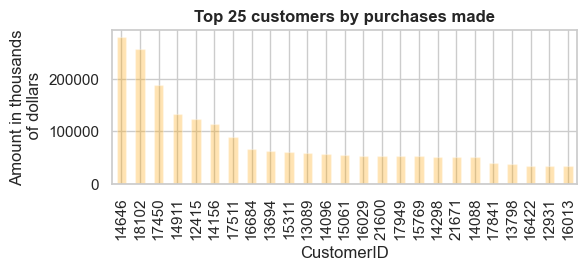

In [167]:
################################################################################################################################
# extract details of top 25 customers based on purchases they made during that period, and plot them
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
RetailData_grp_cust = RetailData.groupby(by='CustomerID').sum('Amount')
RetailData_grp_cust = RetailData_grp_cust.sort_values(by='Amount',ascending=False)
plt.figure(figsize=(6,2))
RetailData_grp_cust.Amount.head(25).plot(kind='bar',color='orange',alpha=.3)
plt.ylabel('Amount in thousands\n of dollars')
plt.title('Top 25 customers by purchases made',fontweight='bold')
plt.show()

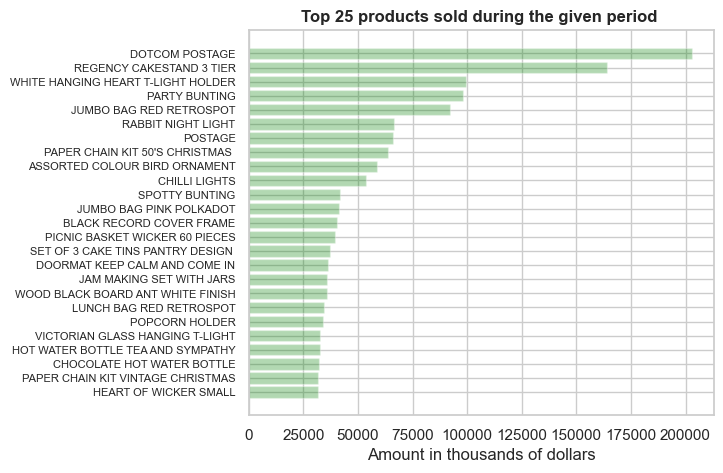

In [30]:
################################################################################################################################
# extract top 25 products by amount that were sold during that period, and plot them
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
RetailData_grp_stock = RetailData.groupby(by='Description').sum('Amount')  
RetailData_grp_stock = RetailData_grp_stock.sort_values(by='Amount',ascending=False)
plt.figure(figsize=(6,5))
A=RetailData_grp_stock.Amount.head(25)
A=A.reset_index()
A=A.sort_values(by='Amount',ascending=True)
plt.barh(width=A.Amount,y=A.Description,color='green',alpha=.3)
plt.title('Top 25 products sold during the given period ',fontweight='bold')
plt.yticks(fontsize=8)
plt.xlabel('Amount in thousands of dollars')
plt.show()

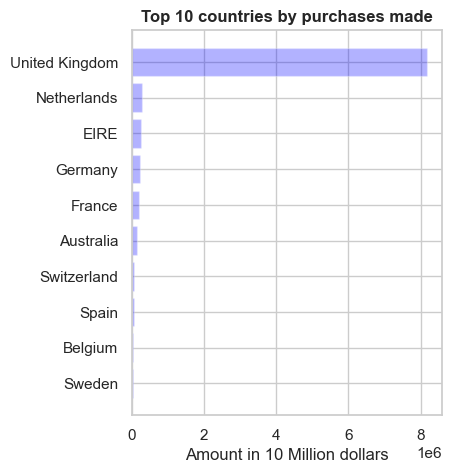

In [31]:
################################################################################################################################
# extract top 10 countries by amount from where customers made purchases during that period, and plot them
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
RetailData_grp_ctry = RetailData.groupby(by='Country').sum('Amount')
RetailData_grp_ctry = RetailData_grp_ctry.sort_values(by='Amount',ascending=False)
plt.figure(figsize=(4,5))
A=RetailData_grp_ctry.Amount.head(10)
A=A.reset_index()
A=A.sort_values(by='Amount',ascending=True)
plt.barh(width=A.Amount,y=A.Country,color='blue',alpha=.3)
plt.xlabel('Amount in 10 Million dollars')
plt.title('Top 10 countries by purchases made',fontweight='bold')
plt.show()

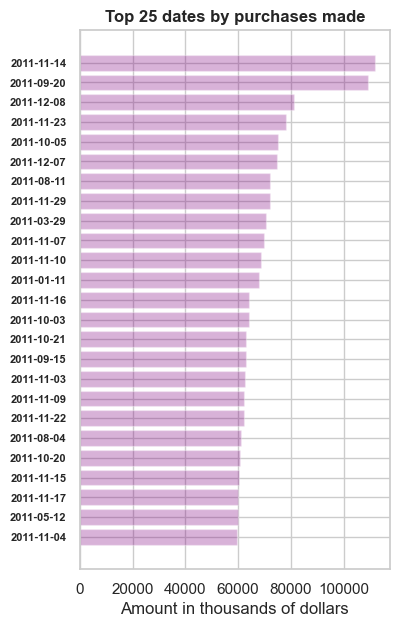

In [32]:
################################################################################################################################
# extract top 25 dates by amount on which customers made most purchases, and plot them
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
RetailData_grp_dates = RetailData.groupby(by='InvoiceDate_only').sum('Amount')
RetailData_grp_dates = RetailData_grp_dates.sort_values(by='Amount',ascending=False)
plt.figure(figsize=(4,7))
A=RetailData_grp_dates.Amount.head(25)
A=A.reset_index()
A=A.sort_values(by='Amount',ascending=True)
plt.barh(width=A.Amount,y=A.InvoiceDate_only,color='purple',alpha=.3)
plt.xlabel('Amount in thousands of dollars')
plt.title('Top 25 dates by purchases made',fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

In [33]:
printmd('Cohort Analysis: Creating Monthly cohorts to analyze Customer Retention Rate'.center(120))

## <span style="color:#ff6611">                      Cohort Analysis: Creating Monthly cohorts to analyze Customer Retention Rate                      </span>

In [34]:
################################################################################################################################
# extarct the maximum value of the invoice date
################################################################################################################################
RetailData.InvoiceDate_only.max()

'2011-12-09'

In [35]:
################################################################################################################################
# extract the minimum value of the invoice date
################################################################################################################################
RetailData.InvoiceDate_only.min()

'2010-12-01'

In [36]:
################################################################################################################################
# Create a copy of the file to work on
################################################################################################################################
RetailData_tmp = RetailData.copy()

In [37]:
################################################################################################################################
# Create new field 'Month' in the newly created temp file in the format yyyy-mm
################################################################################################################################
RetailData_tmp['Month'] = RetailData_tmp.InvoiceDate.dt.year.astype(str)+'-'+RetailData_tmp.InvoiceDate.dt.month.astype(str)


In [38]:
################################################################################################################################
# calculate the customers count for each month
################################################################################################################################
RR_CAL=RetailData_tmp.drop_duplicates(subset=['CustomerID']).groupby('Month').count()['CustomerID'].reset_index()
RR_CAL.head()

,Month,CustomerID
0,2010-12,719
1,2011-1,526
2,2011-10,856
3,2011-11,1000
4,2011-12,214


In [39]:
################################################################################################################################
# create another dataframe with customerID shifted by 1
################################################################################################################################
RR_CAL2 = RR_CAL.copy()
RR_CAL2['CustomerID']=RR_CAL['CustomerID'].shift(1)
RR_CAL2.head()

,Month,CustomerID
0,2010-12,NaN
1,2011-1,719.0
2,2011-10,526.0
3,2011-11,856.0
4,2011-12,1000.0


In [40]:
################################################################################################################################
# combine coulumns from 2 dataframes into single dataframe as below and also add a new field 'monthly customer retension rate'
# this is the general customer retension rate for each month
################################################################################################################################
Monthly_RR = RR_CAL.copy()
Monthly_RR['CustomerID_Prev'] = RR_CAL2['CustomerID']
def func_rr(row):
    RR = row.CustomerID/row.CustomerID_Prev
    return RR


Monthly_RR['Monthly_Customer_Retention_Rate'] = Monthly_RR.apply(lambda row: func_rr(row),axis =1)
Monthly_RR.head()

,Month,CustomerID,CustomerID_Prev,Monthly_Customer_Retention_Rate
0,2010-12,719,NaN,NaN
1,2011-1,526,719.0,0.731572
2,2011-10,856,526.0,1.627376
3,2011-11,1000,856.0,1.168224
4,2011-12,214,1000.0,0.214000


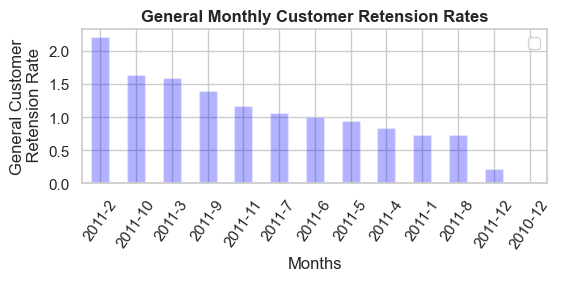

In [165]:
################################################################################################################################
# plot the above created customer retension rates as bar chart for each month(indexed by month)
################################################################################################################################
Monthly_RR=Monthly_RR.set_index('Month')
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
Monthly_RR.Monthly_Customer_Retention_Rate.sort_values(ascending=False).plot(kind='bar',color='blue',alpha=.3)
plt.title('General Monthly Customer Retension Rates',fontweight='bold')
plt.xlabel('Months')
plt.ylabel('General Customer\n Retension Rate')
plt.xticks(rotation=55)
plt.legend('')
plt.show()

In [42]:
printmd('General Customer Retension Rate was highest in Feb 2011 and lowest in Dec 2011 (because of partial data)') 

## <span style="color:#ff6611">General Customer Retension Rate was highest in Feb 2011 and lowest in Dec 2011 (because of partial data)</span>

In [43]:
printmd('Loyal Customer / Repeat Customer Retension Rate Calculation Next')

## <span style="color:#ff6611">Loyal Customer / Repeat Customer Retension Rate Calculation Next</span>

In [44]:
################################################################################################################################
# the above extracted retension rates was just based on number, irrespective of what type of customer it is, whether it is new
# customer, or old customer or a repeat/loyal customer. Now we will calculate the retension rates of loyal/repeat customers
# by checking actual customers by their ID from one month the next, by extracting all unique customers of each month.
################################################################################################################################

In [45]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of December 2010
################################################################################################################################
RetailData_2010_12_1 = RetailData[(RetailData.InvoiceDate_only>='2010-12-01') & (RetailData.InvoiceDate_only<'2011-01-01')]
Customers2010_12 = RetailData_2010_12_1.CustomerID.unique()
RetailData_2010_12_1.CustomerID.nunique()

1265

In [46]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of January 2011
################################################################################################################################
RetailData_2011_01_1 = RetailData[(RetailData.InvoiceDate_only>='2011-01-01') & (RetailData.InvoiceDate_only<'2011-02-01')]
Customers2011_01 = RetailData_2011_01_1.CustomerID.unique()
RetailData_2011_01_1.CustomerID.nunique()

1023

In [47]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of February 2011 
################################################################################################################################
RetailData_2011_02_1 = RetailData[(RetailData.InvoiceDate_only>='2011-02-01') & (RetailData.InvoiceDate_only<'2011-03-01')]
Customers2011_02 = RetailData_2011_02_1.CustomerID.unique()
RetailData_2011_02_1.CustomerID.nunique()

989

In [48]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of March 2011 
################################################################################################################################
RetailData_2011_03_1 = RetailData[(RetailData.InvoiceDate_only>='2011-03-01') & (RetailData.InvoiceDate_only<'2011-04-01')]
Customers2011_03 = RetailData_2011_03_1.CustomerID.unique()
RetailData_2011_03_1.CustomerID.nunique()

1384

In [49]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of April 2011 
################################################################################################################################
RetailData_2011_04_1 = RetailData[(RetailData.InvoiceDate_only>='2011-04-01') & (RetailData.InvoiceDate_only<'2011-05-01')]
Customers2011_04 = RetailData_2011_04_1.CustomerID.unique()
RetailData_2011_04_1.CustomerID.nunique()

1259

In [50]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of May 2011 
################################################################################################################################
RetailData_2011_05_1 = RetailData[(RetailData.InvoiceDate_only>='2011-05-01') & (RetailData.InvoiceDate_only<'2011-06-01')]
Customers2011_05 = RetailData_2011_05_1.CustomerID.unique()
RetailData_2011_05_1.CustomerID.nunique()

1392

In [51]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of June 2011 
################################################################################################################################
RetailData_2011_06_1 = RetailData[(RetailData.InvoiceDate_only>='2011-06-01') & (RetailData.InvoiceDate_only<'2011-07-01')]
Customers2011_06 = RetailData_2011_06_1.CustomerID.unique()
RetailData_2011_06_1.CustomerID.nunique()

1356

In [52]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of July 2011 
################################################################################################################################
RetailData_2011_07_1 = RetailData[(RetailData.InvoiceDate_only>='2011-07-01') & (RetailData.InvoiceDate_only<'2011-08-01')]
Customers2011_07 = RetailData_2011_07_1.CustomerID.unique()
RetailData_2011_07_1.CustomerID.nunique()

1327

In [53]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of August 2011 
################################################################################################################################
RetailData_2011_08_1 = RetailData[(RetailData.InvoiceDate_only>='2011-08-01') & (RetailData.InvoiceDate_only<'2011-09-01')]
Customers2011_08 = RetailData_2011_08_1.CustomerID.unique()
RetailData_2011_08_1.CustomerID.nunique()

1173

In [54]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of September 2011 
################################################################################################################################
RetailData_2011_09_1 = RetailData[(RetailData.InvoiceDate_only>='2011-09-01') & (RetailData.InvoiceDate_only<'2011-10-01')]
Customers2011_09 = RetailData_2011_09_1.CustomerID.unique()
RetailData_2011_09_1.CustomerID.nunique()

1551

In [55]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of October 2011 
################################################################################################################################
RetailData_2011_10_1 = RetailData[(RetailData.InvoiceDate_only>='2011-10-01') & (RetailData.InvoiceDate_only<'2011-11-01')]
Customers2011_10 = RetailData_2011_10_1.CustomerID.unique()
RetailData_2011_10_1.CustomerID.nunique()

1799

In [56]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of November 2011 
################################################################################################################################
RetailData_2011_11_1 = RetailData[(RetailData.InvoiceDate_only>='2011-11-01') & (RetailData.InvoiceDate_only<'2011-12-01')]
Customers2011_11 = RetailData_2011_11_1.CustomerID.unique()
RetailData_2011_11_1.CustomerID.nunique()

2087

In [57]:
################################################################################################################################
# Below code if for extracting unique cutomers and the total number of unique customers for the month of December 2011 
################################################################################################################################
RetailData_2011_12_1 = RetailData[(RetailData.InvoiceDate_only>='2011-12-01') & (RetailData.InvoiceDate_only<'2012-01-01')]
Customers2011_12 = RetailData_2011_12_1.CustomerID.unique()
RetailData_2011_12_1.CustomerID.nunique()

780

In [58]:
################################################################################################################################
# Here we are checking whether a customer from Dec-2010 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months
################################################################################################################################
Dec2010Jan=Dec2010Feb=Dec2010Mar=Dec2010Apr=Dec2010May=Dec2010Jun=Dec2010Jul=Dec2010Aug=Dec2010Sep=Dec2010Oct=Dec2010Nov=\
Dec2010Dec=0
for i in range(Customers2010_12.size): 
    if Customers2010_12[i] in Customers2011_01:
        Dec2010Jan+=1
    if Customers2010_12[i] in Customers2011_02:
        Dec2010Feb+=1
    if Customers2010_12[i] in Customers2011_03:
        Dec2010Mar+=1
    if Customers2010_12[i] in Customers2011_04:
        Dec2010Apr+=1
    if Customers2010_12[i] in Customers2011_05:
        Dec2010May+=1
    if Customers2010_12[i] in Customers2011_06:
        Dec2010Jun+=1
    if Customers2010_12[i] in Customers2011_07:
        Dec2010Jul+=1
    if Customers2010_12[i] in Customers2011_08:
        Dec2010Aug+=1
    if Customers2010_12[i] in Customers2011_09:
        Dec2010Sep+=1
    if Customers2010_12[i] in Customers2011_10:
        Dec2010Oct+=1
    if Customers2010_12[i] in Customers2011_11:
        Dec2010Nov+=1
    if Customers2010_12[i] in Customers2011_12:
        Dec2010Dec+=1
list1 = []       
Tot = 100/RetailData_2010_12_1.CustomerID.nunique()
a=[Dec2010Jan*Tot,Dec2010Feb*Tot,Dec2010Mar*Tot,Dec2010Apr*Tot,Dec2010May*Tot,Dec2010Jun*Tot,Dec2010Jul*Tot,Dec2010Aug*Tot,\
Dec2010Sep*Tot,Dec2010Oct*Tot,Dec2010Nov*Tot,Dec2010Dec*Tot]
list1.append(a)
rr1=(Dec2010Jan*Tot+Dec2010Feb*Tot+Dec2010Mar*Tot+Dec2010Apr*Tot+Dec2010May*Tot+Dec2010Jun*Tot+Dec2010Jul*Tot+Dec2010Aug*Tot+\
Dec2010Sep*Tot+Dec2010Oct*Tot+Dec2010Nov*Tot+Dec2010Dec*Tot)/12
print('Average Loyal Customer Retention Rate for Dec 2010:',rr1)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for Dec 2010:')
Dec2010Jan*Tot,Dec2010Feb*Tot,Dec2010Mar*Tot,Dec2010Apr*Tot,Dec2010May*Tot,Dec2010Jun*Tot,Dec2010Jul*Tot,Dec2010Aug*Tot,\
Dec2010Sep*Tot,Dec2010Oct*Tot,Dec2010Nov*Tot,Dec2010Dec*Tot

Average Loyal Customer Retention Rate for Dec 2010: 28.043478260869563
 
Below are Monthly Loyal Customer Retention Rates for Dec 2010:


(28.616600790513836,
 25.059288537549406,
 29.011857707509883,
 26.956521739130434,
 29.723320158102766,
 28.458498023715414,
 26.561264822134387,
 26.561264822134387,
 29.565217391304348,
 27.98418972332016,
 37.4703557312253,
 20.55335968379447)

In [59]:
################################################################################################################################
# Here we are checking whether a customer from Jan-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months
################################################################################################################################
Jan2011Feb=Jan2011Mar=Jan2011Apr=Jan2011May=Jan2011Jun=Jan2011Jul=Jan2011Aug=Jan2011Sep=Jan2011Oct=Jan2011Nov=Jan2011Dec=0
for i in range(Customers2011_01.size): 
    if Customers2011_01[i] in Customers2011_02:
        Jan2011Feb+=1
    if Customers2011_01[i] in Customers2011_03:
        Jan2011Mar+=1
    if Customers2011_01[i] in Customers2011_04:
        Jan2011Apr+=1
    if Customers2011_01[i] in Customers2011_05:
        Jan2011May+=1
    if Customers2011_01[i] in Customers2011_06:
        Jan2011Jun+=1
    if Customers2011_01[i] in Customers2011_07:
        Jan2011Jul+=1
    if Customers2011_01[i] in Customers2011_08:
        Jan2011Aug+=1
    if Customers2011_01[i] in Customers2011_09:
        Jan2011Sep+=1
    if Customers2011_01[i] in Customers2011_10:
        Jan2011Oct+=1
    if Customers2011_01[i] in Customers2011_11:
        Jan2011Nov+=1
    if Customers2011_01[i] in Customers2011_12:
        Jan2011Dec+=1

Tot = 100/RetailData_2011_01_1.CustomerID.nunique() 
a=[Jan2011Feb*Tot,Jan2011Mar*Tot,Jan2011Apr*Tot,Jan2011May*Tot,Jan2011Jun*Tot,Jan2011Jul*Tot,Jan2011Aug*Tot,  \
Jan2011Sep*Tot,Jan2011Oct*Tot,Jan2011Nov*Tot,Jan2011Dec*Tot]
list1.append(a)
rr2=(Jan2011Feb*Tot+Jan2011Mar*Tot+Jan2011Apr*Tot+Jan2011May*Tot+Jan2011Jun*Tot+Jan2011Jul*Tot+Jan2011Aug*Tot+  \
Jan2011Sep*Tot+Jan2011Oct*Tot+Jan2011Nov*Tot+Jan2011Dec*Tot)/11
print('Average Loyal Customer Retention Rate for Jan 2011:',rr2)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for Jan 2011:')

Jan2011Feb*Tot,Jan2011Mar*Tot,Jan2011Apr*Tot,Jan2011May*Tot,Jan2011Jun*Tot,Jan2011Jul*Tot,Jan2011Aug*Tot,\
Jan2011Sep*Tot,Jan2011Oct*Tot,Jan2011Nov*Tot,Jan2011Dec*Tot

Average Loyal Customer Retention Rate for Jan 2011: 31.964809384164223
 
Below are Monthly Loyal Customer Retention Rates for Jan 2011:


(29.227761485826,
 33.822091886608014,
 29.81427174975562,
 35.09286412512219,
 33.137829912023456,
 30.694037145650046,
 30.400782013685237,
 33.919843597262954,
 33.235581622678396,
 40.371456500488755,
 21.896383186705766)

In [60]:
################################################################################################################################
# Here we are checking whether a customer from Feb-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months 
################################################################################################################################
Feb2011Mar=Feb2011Apr=Feb2011May=Feb2011Jun=Feb2011Jul=Feb2011Aug=Feb2011Sep=Feb2011Oct=Feb2011Nov=Feb2011Dec=0
for i in range(Customers2011_02.size): 
    if Customers2011_02[i] in Customers2011_03:
        Feb2011Mar+=1
    if Customers2011_02[i] in Customers2011_04:
        Feb2011Apr+=1
    if Customers2011_02[i] in Customers2011_05:
        Feb2011May+=1
    if Customers2011_02[i] in Customers2011_06:
        Feb2011Jun+=1
    if Customers2011_02[i] in Customers2011_07:
        Feb2011Jul+=1
    if Customers2011_02[i] in Customers2011_08:
        Feb2011Aug+=1
    if Customers2011_02[i] in Customers2011_09:
        Feb2011Sep+=1
    if Customers2011_02[i] in Customers2011_10:
        Feb2011Oct+=1
    if Customers2011_02[i] in Customers2011_11:
        Feb2011Nov+=1
    if Customers2011_02[i] in Customers2011_12:
        Feb2011Dec+=1

Tot = 100/RetailData_2011_02_1.CustomerID.nunique()
a=[Feb2011Mar*Tot,Feb2011Apr*Tot,Feb2011May*Tot,Feb2011Jun*Tot,Feb2011Jul*Tot,Feb2011Aug*Tot,Feb2011Sep*Tot,   \
Feb2011Oct*Tot,Feb2011Nov*Tot,Feb2011Dec*Tot]
list1.append(a)
rr3=(Feb2011Mar*Tot+Feb2011Apr*Tot+Feb2011May*Tot+Feb2011Jun*Tot+Feb2011Jul*Tot+Feb2011Aug*Tot+Feb2011Sep*Tot+    \
Feb2011Oct*Tot+Feb2011Nov*Tot+Feb2011Dec*Tot)/10
print('Average Loyal Customer Retention Rate for Feb 2011:',rr3)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for Feb 2011:')

Feb2011Mar*Tot,Feb2011Apr*Tot,Feb2011May*Tot,Feb2011Jun*Tot,Feb2011Jul*Tot,Feb2011Aug*Tot,Feb2011Sep*Tot,\
Feb2011Oct*Tot,Feb2011Nov*Tot,Feb2011Dec*Tot

Average Loyal Customer Retention Rate for Feb 2011: 33.83215369059656
 
Below are Monthly Loyal Customer Retention Rates for Feb 2011:


(34.883720930232556,
 31.041456016177957,
 38.22042467138524,
 35.591506572295245,
 33.67037411526795,
 32.861476238624874,
 36.29929221435793,
 34.27704752275025,
 40.343781597573305,
 21.1324570273003)

In [61]:
################################################################################################################################
# Here we are checking whether a customer from March-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months 
################################################################################################################################
Mar2011Apr=Mar2011May=Mar2011Jun=Mar2011Jul=Mar2011Aug=Mar2011Sep=Mar2011Oct=Mar2011Nov=Mar2011Dec=0
for i in range(Customers2011_03.size): 
    if Customers2011_03[i] in Customers2011_04:
        Mar2011Apr+=1
    if Customers2011_03[i] in Customers2011_05:
        Mar2011May+=1
    if Customers2011_03[i] in Customers2011_06:
        Mar2011Jun+=1
    if Customers2011_03[i] in Customers2011_07:
        Mar2011Jul+=1
    if Customers2011_03[i] in Customers2011_08:
        Mar2011Aug+=1
    if Customers2011_03[i] in Customers2011_09:
        Mar2011Sep+=1
    if Customers2011_03[i] in Customers2011_10:
        Mar2011Oct+=1
    if Customers2011_03[i] in Customers2011_11:
        Mar2011Nov+=1
    if Customers2011_03[i] in Customers2011_12:
        Mar2011Dec+=1

Tot = 100/RetailData_2011_03_1.CustomerID.nunique()
a=[Mar2011Apr*Tot,Mar2011May*Tot,Mar2011Jun*Tot,Mar2011Jul*Tot,Mar2011Aug*Tot,Mar2011Sep*Tot,Mar2011Oct*Tot,Mar2011Nov*Tot,\
Mar2011Dec*Tot]
list1.append(a)
rr4=(Mar2011Apr*Tot+Mar2011May*Tot+Mar2011Jun*Tot+Mar2011Jul*Tot+Mar2011Aug*Tot+Mar2011Sep*Tot+Mar2011Oct*Tot+Mar2011Nov*Tot+ \
Mar2011Dec*Tot)/9
print('Average Loyal Customer Retention Rate for March 2011:',rr4)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for March 2011:')

Mar2011Apr*Tot,Mar2011May*Tot,Mar2011Jun*Tot,Mar2011Jul*Tot,Mar2011Aug*Tot,Mar2011Sep*Tot,Mar2011Oct*Tot,Mar2011Nov*Tot,\
Mar2011Dec*Tot

Average Loyal Customer Retention Rate for March 2011: 28.97398843930636
 
Below are Monthly Loyal Customer Retention Rates for March 2011:


(25.000000000000004,
 33.09248554913295,
 31.141618497109828,
 28.612716763005782,
 27.38439306358382,
 31.719653179190754,
 29.696531791907518,
 36.05491329479769,
 18.063583815028903)

In [62]:
################################################################################################################################
# Here we are checking whether a customer from April-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months 
################################################################################################################################
Apr2011May=Apr2011Jun=Apr2011Jul=Apr2011Aug=Apr2011Sep=Apr2011Oct=Apr2011Nov=Apr2011Dec=0
for i in range(Customers2011_04.size): 
    if Customers2011_04[i] in Customers2011_05:
        Apr2011May+=1
    if Customers2011_04[i] in Customers2011_06:
        Apr2011Jun+=1
    if Customers2011_04[i] in Customers2011_07:
        Apr2011Jul+=1
    if Customers2011_04[i] in Customers2011_08:
        Apr2011Aug+=1
    if Customers2011_04[i] in Customers2011_09:
        Apr2011Sep+=1
    if Customers2011_04[i] in Customers2011_10:
        Apr2011Oct+=1
    if Customers2011_04[i] in Customers2011_11:
        Apr2011Nov+=1
    if Customers2011_04[i] in Customers2011_12:
        Apr2011Dec+=1
Tot = 100/RetailData_2011_04_1.CustomerID.nunique()
a=[Apr2011May*Tot,Apr2011Jun*Tot,Apr2011Jul*Tot,Apr2011Aug*Tot,Apr2011Sep*Tot,Apr2011Oct*Tot,Apr2011Nov*Tot,Apr2011Dec*Tot]
list1.append(a)
rr5=(Apr2011May*Tot+Apr2011Jun*Tot+Apr2011Jul*Tot+Apr2011Aug*Tot+Apr2011Sep*Tot+Apr2011Oct*Tot+Apr2011Nov*Tot+Apr2011Dec*Tot)/8
print('Average Loyal Customer Retention Rate for April 2011:',rr5)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for April 2011:')

Apr2011May*Tot,Apr2011Jun*Tot,Apr2011Jul*Tot,Apr2011Aug*Tot,Apr2011Sep*Tot,Apr2011Oct*Tot,Apr2011Nov*Tot,Apr2011Dec*Tot

Average Loyal Customer Retention Rate for April 2011: 29.527402700555996
 
Below are Monthly Loyal Customer Retention Rates for April 2011:


(31.691818903891978,
 31.453534551231137,
 29.388403494837174,
 28.19698173153296,
 32.24781572676728,
 30.341540905480542,
 35.34551231135822,
 17.55361397934869)

In [63]:
################################################################################################################################
# Here we are checking whether a customer from May-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months 
################################################################################################################################
May2011Jun=May2011Jul=May2011Aug=May2011Sep=May2011Oct=May2011Nov=May2011Dec=0
for i in range(Customers2011_05.size): 
    if Customers2011_05[i] in Customers2011_06:
        May2011Jun+=1
    if Customers2011_05[i] in Customers2011_07:
        May2011Jul+=1
    if Customers2011_05[i] in Customers2011_08:
        May2011Aug+=1
    if Customers2011_05[i] in Customers2011_09:
        May2011Sep+=1
    if Customers2011_05[i] in Customers2011_10:
        May2011Oct+=1
    if Customers2011_05[i] in Customers2011_11:
        May2011Nov+=1
    if Customers2011_05[i] in Customers2011_12:
        May2011Dec+=1
Tot = 100/RetailData_2011_05_1.CustomerID.nunique()
a=[May2011Jun*Tot,May2011Jul*Tot,May2011Aug*Tot,May2011Sep*Tot,May2011Oct*Tot,May2011Nov*Tot,May2011Dec*Tot]
list1.append(a)
rr6=(May2011Jun*Tot+May2011Jul*Tot+May2011Aug*Tot+May2011Sep*Tot+May2011Oct*Tot+May2011Nov*Tot+May2011Dec*Tot)/7
print('Average Loyal Customer Retention Rate for May 2011:',rr6)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for May 2011:')

May2011Jun*Tot,May2011Jul*Tot,May2011Aug*Tot,May2011Sep*Tot,May2011Oct*Tot,May2011Nov*Tot,May2011Dec*Tot

Average Loyal Customer Retention Rate for May 2011: 31.9991789819376
 
Below are Monthly Loyal Customer Retention Rates for May 2011:


(33.33333333333333,
 32.25574712643678,
 32.183908045977006,
 34.69827586206896,
 32.974137931034484,
 39.29597701149425,
 19.25287356321839)

In [64]:
################################################################################################################################
# Here we are checking whether a customer from June-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months 
################################################################################################################################
Jun2011Jul=Jun2011Aug=Jun2011Sep=Jun2011Oct=Jun2011Nov=Jun2011Dec=0
for i in range(Customers2011_06.size): 
    if Customers2011_06[i] in Customers2011_07:
        Jun2011Jul+=1
    if Customers2011_06[i] in Customers2011_08:
        Jun2011Aug+=1
    if Customers2011_06[i] in Customers2011_09:
        Jun2011Sep+=1
    if Customers2011_06[i] in Customers2011_10:
        Jun2011Oct+=1
    if Customers2011_06[i] in Customers2011_11:
        Jun2011Nov+=1
    if Customers2011_06[i] in Customers2011_12:
        Jun2011Dec+=1
Tot = 100/RetailData_2011_06_1.CustomerID.nunique()
a=[Jun2011Jul*Tot,Jun2011Aug*Tot,Jun2011Sep*Tot,Jun2011Oct*Tot,Jun2011Nov*Tot,Jun2011Dec*Tot]
list1.append(a)
rr7=(Jun2011Jul*Tot+Jun2011Aug*Tot+Jun2011Sep*Tot+Jun2011Oct*Tot+Jun2011Nov*Tot+Jun2011Dec*Tot)/6
print('Average Loyal Customer Retention Rate for June 2011:',rr7)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for June 2011:')

Jun2011Jul*Tot,Jun2011Aug*Tot,Jun2011Sep*Tot,Jun2011Oct*Tot,Jun2011Nov*Tot,Jun2011Dec*Tot

Average Loyal Customer Retention Rate for June 2011: 32.497541789577184
 
Below are Monthly Loyal Customer Retention Rates for June 2011:


(30.6047197640118,
 32.89085545722714,
 36.72566371681416,
 34.882005899705014,
 40.41297935103245,
 19.469026548672566)

In [65]:
################################################################################################################################
# Here we are checking whether a customer from July-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months 
################################################################################################################################
Jul2011Aug=Jul2011Sep=Jul2011Oct=Jul2011Nov=Jul2011Dec=0
for i in range(Customers2011_07.size): 
    if Customers2011_07[i] in Customers2011_08:
        Jul2011Aug+=1
    if Customers2011_07[i] in Customers2011_09:
        Jul2011Sep+=1
    if Customers2011_07[i] in Customers2011_10:
        Jul2011Oct+=1
    if Customers2011_07[i] in Customers2011_11:
        Jul2011Nov+=1
    if Customers2011_07[i] in Customers2011_12:
        Jul2011Dec+=1
Tot = 100/RetailData_2011_07_1.CustomerID.nunique()
a=[Jul2011Aug*Tot,Jul2011Sep*Tot,Jul2011Oct*Tot,Jul2011Nov*Tot,Jul2011Dec*Tot]
list1.append(a)
rr8=(Jul2011Aug*Tot+Jul2011Sep*Tot+Jul2011Oct*Tot+Jul2011Nov*Tot+Jul2011Dec*Tot)/5
print('Average Loyal Customer Retention Rate for July 2011:',rr8)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for July 2011:')

Jul2011Aug*Tot,Jul2011Sep*Tot,Jul2011Oct*Tot,Jul2011Nov*Tot,Jul2011Dec*Tot

Average Loyal Customer Retention Rate for July 2011: 32.283345892991704
 
Below are Monthly Loyal Customer Retention Rates for July 2011:


(32.629992464204975,
 34.21250941974379,
 34.89073097211756,
 39.86435568952525,
 19.819140919366994)

In [66]:
################################################################################################################################
# Here we are checking whether a customer from August-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months 
################################################################################################################################
Aug2011Sep=Aug2011Oct=Aug2011Nov=Aug2011Dec=0
for i in range(Customers2011_08.size): 
    if Customers2011_08[i] in Customers2011_09:
        Aug2011Sep+=1
    if Customers2011_08[i] in Customers2011_10:
        Aug2011Oct+=1
    if Customers2011_08[i] in Customers2011_11:
        Aug2011Nov+=1
    if Customers2011_08[i] in Customers2011_12:
        Aug2011Dec+=1

Tot = 100/RetailData_2011_08_1.CustomerID.nunique() 
a=[Aug2011Sep*Tot,Aug2011Oct*Tot,Aug2011Nov*Tot,Aug2011Dec*Tot]
list1.append(a)
rr9=(Aug2011Sep*Tot+Aug2011Oct*Tot+Aug2011Nov*Tot+Aug2011Dec*Tot)/4
print('Average Loyal Customer Retention Rate for August 2011:',rr9)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for August 2011:')

Aug2011Sep*Tot,Aug2011Oct*Tot,Aug2011Nov*Tot,Aug2011Dec*Tot

Average Loyal Customer Retention Rate for August 2011: 36.70076726342711
 
Below are Monthly Loyal Customer Retention Rates for August 2011:


(39.64194373401534, 38.192668371696506, 45.43904518329071, 23.529411764705884)

In [67]:
################################################################################################################################
# Here we are checking whether a customer from Sep-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months 
################################################################################################################################
Sep2011Oct=Sep2011Nov=Sep2011Dec=0
for i in range(Customers2011_09.size): 
    if Customers2011_09[i] in Customers2011_10:
        Sep2011Oct+=1
    if Customers2011_09[i] in Customers2011_11:
        Sep2011Nov+=1
    if Customers2011_09[i] in Customers2011_12:
        Sep2011Dec+=1
Tot = 100/RetailData_2011_09_1.CustomerID.nunique()
a=[Sep2011Oct*Tot,Sep2011Nov*Tot,Sep2011Dec*Tot]
list1.append(a)
rr10=(Sep2011Oct*Tot+Sep2011Nov*Tot+Sep2011Dec*Tot)/3
print('Average Loyal Customer Retention Rate for September 2011:',rr10)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for September 2011:')

Sep2011Oct*Tot,Sep2011Nov*Tot,Sep2011Dec*Tot

Average Loyal Customer Retention Rate for September 2011: 34.364925854287556
 
Below are Monthly Loyal Customer Retention Rates for September 2011:


(35.5899419729207, 45.32559638942618, 22.1792392005158)

In [68]:
################################################################################################################################
# Here we are checking whether a customer from oct-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months 
################################################################################################################################
Oct2011Nov=Oct2011Dec=0
for i in range(Customers2011_10.size): 
    if Customers2011_10[i] in Customers2011_11:
        Oct2011Nov+=1
    if Customers2011_10[i] in Customers2011_12:
        Oct2011Dec+=1
Tot = 100/RetailData_2011_10_1.CustomerID.nunique()
a=[Oct2011Nov*Tot,Oct2011Dec*Tot]
list1.append(a)
rr11=(Oct2011Nov*Tot+Oct2011Dec*Tot)/2
print('Average Loyal Customer Retention Rate for October 2011:',rr11)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for October 2011:')

Oct2011Nov*Tot,Oct2011Dec*Tot

Average Loyal Customer Retention Rate for October 2011: 29.266259032795997
 
Below are Monthly Loyal Customer Retention Rates for October 2011:


(38.35464146748193, 20.17787659811006)

In [69]:
################################################################################################################################
# Here we are checking whether a customer from JNov-2011 has made any purchases in the following months till Dec-2011
# If in any month they make, then we increase the count of loyal customers for that month. And at end we calculate the 
# Average loyal customer retension rate for that month and also for the following months 
################################################################################################################################
Nov2011Dec=0
for i in range(Customers2011_11.size): 
    if Customers2011_11[i] in Customers2011_12:
        Nov2011Dec+=1
Tot = 100/RetailData_2011_11_1.CustomerID.nunique()
a=[Nov2011Dec*Tot]
list1.append(a)
rr12=Nov2011Dec*Tot
print('Average Loyal Customer Retention Rate for November 2011:',rr12)
print(' ')
print('Below are Monthly Loyal Customer Retention Rates for November 2011:')

Nov2011Dec*Tot

Average Loyal Customer Retention Rate for November 2011: 21.22664111164351
 
Below are Monthly Loyal Customer Retention Rates for November 2011:


21.22664111164351

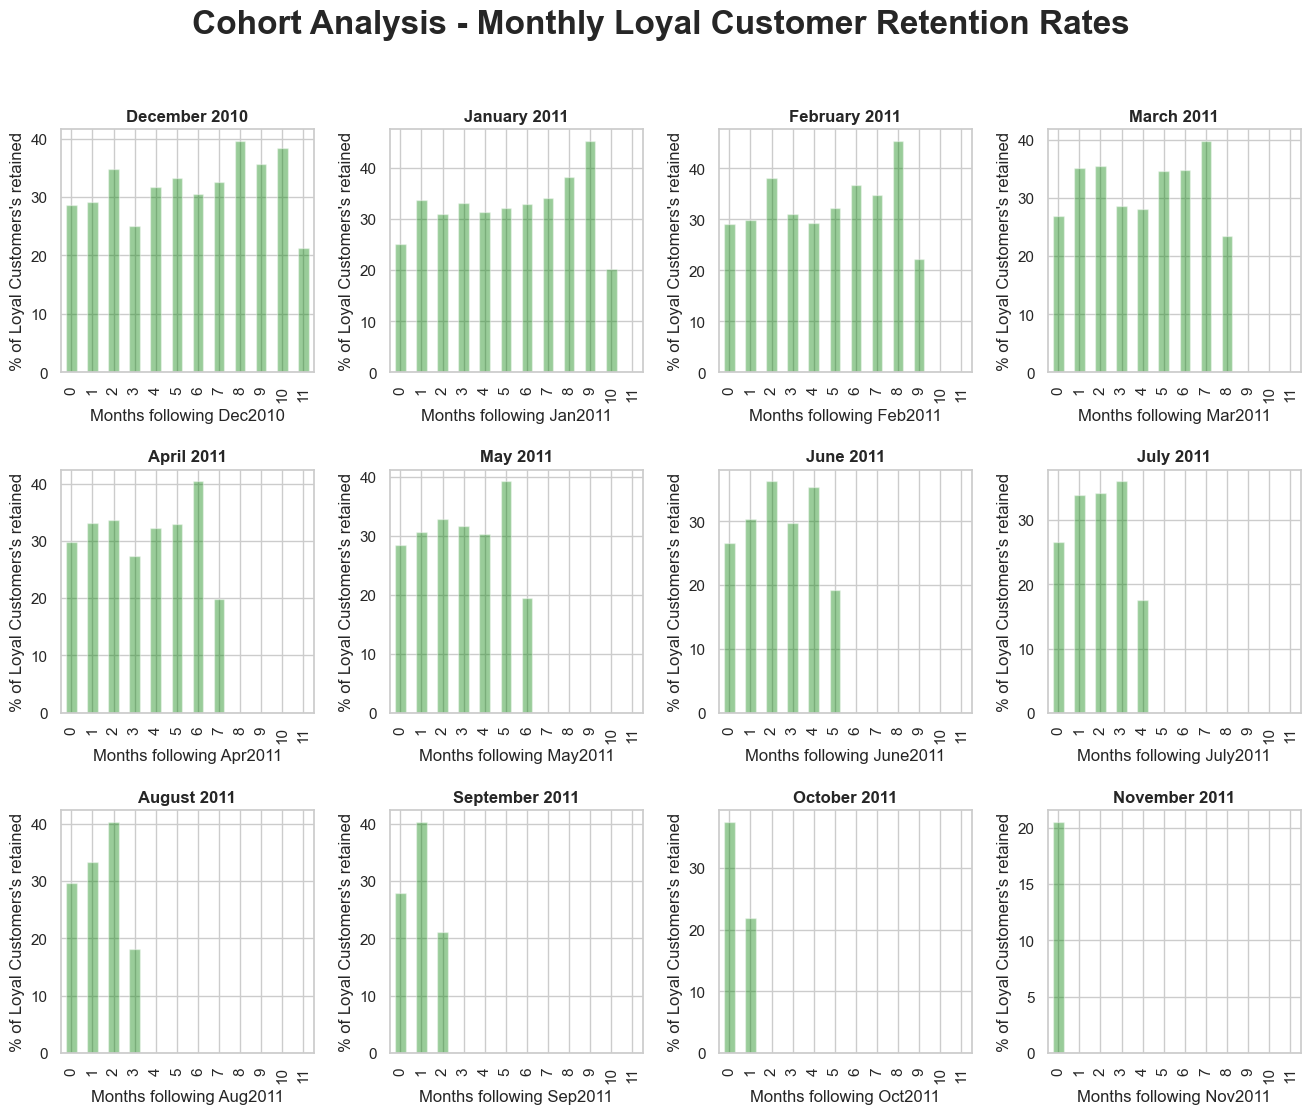

In [70]:
################################################################################################################################
# Here we are plotting the loyal customer retension rates for each month and its following months in subplots
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(16,12))
list1 = pd.DataFrame(list1)
for i in range(len(list1)):
    plt.subplots_adjust(wspace=.3,hspace=.4)
    plt.subplot(3,4,i+1)
    list1[i].plot(kind='bar',color='green',alpha=.4)
    plt.ylabel("% of Loyal Customers's retained")
    plt.suptitle("Cohort Analysis - Monthly Loyal Customer Retention Rates",fontweight='bold',fontsize=24)
    if i==0:
        plt.title('December 2010',fontweight='bold')
        plt.xlabel('Months following Dec2010')

    elif i==1:
        plt.title('January 2011',fontweight='bold')
        plt.xlabel('Months following Jan2011')
    elif i==2:
        plt.title('February 2011',fontweight='bold')
        plt.xlabel('Months following Feb2011')
    elif i==3:
        plt.title('March 2011',fontweight='bold')
        plt.xlabel('Months following Mar2011')
    elif i==4:
        plt.title('April 2011',fontweight='bold')
        plt.xlabel('Months following Apr2011')
    elif i==5:
        plt.title('May 2011',fontweight='bold')
        plt.xlabel('Months following May2011')
    elif i==6:
        plt.title('June 2011',fontweight='bold')
        plt.xlabel('Months following June2011')
    elif i==7:
        plt.title('July 2011',fontweight='bold')
        plt.xlabel('Months following July2011')
    elif i==8:
        plt.title('August 2011',fontweight='bold')
        plt.xlabel('Months following Aug2011')
    elif i==9:
        plt.title('September 2011',fontweight='bold')
        plt.xlabel('Months following Sep2011')
    elif i==10:
        plt.title('October 2011',fontweight='bold')
        plt.xlabel('Months following Oct2011')
    else:
        plt.title('November 2011',fontweight='bold')
        plt.xlabel('Months following Nov2011')
    
plt.show()

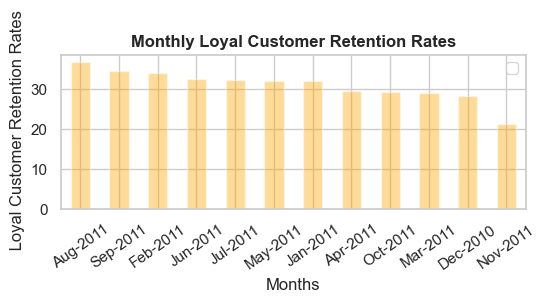

In [162]:
################################################################################################################################
# the below plot is for monthly loyal customer retension rates for each month in the order of decreasing value
################################################################################################################################
Dict1 = {' Loyal Customer Retension Rates':(rr1,rr2,rr3,rr4,rr5,rr6,rr7,rr8,rr9,rr10,rr11,rr12)}
Dictind = ['Dec-2010','Jan-2011','Feb-2011','Mar-2011','Apr-2011','May-2011','Jun-2011','Jul-2011','Aug-2011','Sep-2011',\
           'Oct-2011','Nov-2011']
RetentionRates = pd.DataFrame(Dict1,index=Dictind)
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
RetentionRates.sort_values(' Loyal Customer Retension Rates',ascending=False).plot(kind='bar',\
                                                    color='orange',alpha=0.4,figsize=(6,2))  
plt.title('Monthly Loyal Customer Retention Rates',fontweight='bold')
plt.xlabel('Months')
plt.xticks(rotation=35)
plt.legend('')
plt.ylabel(' Loyal Customer Retention Rates')
plt.show()

In [72]:
printmd('Loyal Customer Retension Rate was highest in August 2011 and lowest in Nov 2011')

## <span style="color:#ff6611">Loyal Customer Retension Rate was highest in August 2011 and lowest in Nov 2011</span>

In [161]:
printmd('RFM Model Building:')
printmd('Calculating Recency, Frequency and Monetary scores and consolidated RFM Score')

## <span style="color:#ff6611">RFM Model Building:</span>

## <span style="color:#ff6611">Calculating Recency, Frequency and Monetary scores and consolidated RFM Score</span>

In [74]:
################################################################################################################################
# Create a new field LastPurchaseDate to populate the last invoice date(only) of that customer in all the rows of that customer
################################################################################################################################
RetailData['LastPurchaseDate'] = RetailData.groupby('CustomerID').InvoiceDate_only.transform('last')

In [75]:
################################################################################################################################
# based on the newly created field, create another field days_from_lastpurchase to populate number of days from last purchase.
################################################################################################################################
def func_days_calc(row):
    from datetime import date
    y,m,d = str.split(row.LastPurchaseDate,sep='-')
    d1 = date(int(y),int(m),int(d))
    y,m,d = str.split('2011-12-09',sep='-')
    d2 = date(int(y),int(m),int(d))
    #d2 = date.today()
    delta = d2 - d1
    days = delta.days
    return days


RetailData['days_from_lastpurchase'] = RetailData.apply(lambda row: func_days_calc(row),axis=1)

In [76]:
################################################################################################################################
# Create another field Num_purchases to populate number of purchases made by the customer during the said period. 
################################################################################################################################
RetailData['Num_purchases'] = RetailData.groupby(by='CustomerID').StockCode.transform('count')

In [77]:
################################################################################################################################
# another field for total_amount_spent by customer 
################################################################################################################################
RetailData['Total_Amount_Spent'] = RetailData.groupby(by='CustomerID').Amount.transform('sum')

In [78]:
################################################################################################################################
# after creating the above fields, look at one of the row to see they are created properly
################################################################################################################################
RetailData.iloc[0,:]

InvoiceNo                             C570456
StockCode                                   S
Description                           SAMPLES
Quantity                                   -1
InvoiceDate               2011-10-10 15:38:00
UnitPrice                               98.18
CustomerID                              21261
Country                        United Kingdom
InvoiceDate_only                   2011-10-10
Amount                                 -98.18
LastPurchaseDate                   2011-10-10
days_from_lastpurchase                     60
Num_purchases                               2
Total_Amount_Spent                    -103.06
Name: 388829, dtype: object

In [79]:
################################################################################################################################
# find the statistics on the days_from_lastpurchase field created above to use grading the Recncy score.
################################################################################################################################
RetailData.days_from_lastpurchase.describe()

count    536660.000000
mean         74.163476
std         102.404573
min           0.000000
25%           5.000000
50%          24.000000
75%          98.000000
max         373.000000
Name: days_from_lastpurchase, dtype: float64

In [80]:
################################################################################################################################
# create a recency function and use it in lambda function to populate the recency field that we need to create
# days and score are inversly related here. More the days, least is the rank
################################################################################################################################
def func_recency(row):
    if (row.days_from_lastpurchase <= 5):
        return 4
    elif ((row.days_from_lastpurchase > 5) & (row.days_from_lastpurchase <= 24) ):
        return 3
    elif ((row.days_from_lastpurchase > 24) & (row.days_from_lastpurchase <= 98) ):
        return 2
    else:
        return 1


RetailData['Recency'] = RetailData.apply(lambda row: func_recency(row),axis=1)

In [81]:
################################################################################################################################
# Similarly get the stats on num_purchases field.,to Use in scoring Frequency field to be created
################################################################################################################################
RetailData.Num_purchases.describe()

count    536660.000000
mean        569.741237
std        1267.437904
min           1.000000
25%          98.000000
50%         212.000000
75%         450.000000
max        7813.000000
Name: Num_purchases, dtype: float64

In [82]:
################################################################################################################################
# create frequency function and use it in Lambda functio to populate all rows of the frequency field(new)
# purchases and Frequency are directly related. More purchases get better score.
################################################################################################################################
def func_frequency(row):
    if (row.Num_purchases < 98):
        return 1
    elif ((row.Num_purchases >= 98) & (row.Num_purchases < 212) ):
        return 2
    elif ((row.Num_purchases >= 212) & (row.Num_purchases < 450) ):
        return 3
    else:
        return 4


RetailData['Frequency'] = RetailData.apply(lambda row: func_frequency(row),axis=1)

In [83]:
################################################################################################################################
# get the stats on Total_amount_spent to score and populate monetary field.
################################################################################################################################
RetailData.Total_Amount_Spent.describe()

count    536660.000000
mean       9120.370001
std       26477.828132
min      -17836.460000
25%        1207.280000
50%        2456.980000
75%        5521.140000
max      279489.020000
Name: Total_Amount_Spent, dtype: float64

In [84]:
################################################################################################################################
# create moentary function to use in lambda function to populate new field Monetary of all rows
# directly related, more amount spent get better scoring
################################################################################################################################
def func_monetary(row):
    if (row.Total_Amount_Spent < 1207.28):
        return 1
    elif ((row.Total_Amount_Spent >= 1207.28) & (row.Total_Amount_Spent <2456.98) ):
        return 2
    elif ((row.Total_Amount_Spent >= 2456.98) & (row.Total_Amount_Spent < 5521.14) ):
        return 3
    else:
        return 4

RetailData['Monetary'] = RetailData.apply(lambda row: func_monetary(row),axis=1)

In [85]:
################################################################################################################################
# create a function for consolidating R,F,M Scores and populate in a new field RFM_Score
################################################################################################################################
def func_rfm_score(row):
    return (row.Monetary+row.Frequency+row.Recency)

RetailData['RFM_score'] = RetailData.apply(lambda row: func_rfm_score(row),axis=1)

In [86]:
################################################################################################################################
# look at the top 2 rows to make sure everything is ok.
################################################################################################################################
RetailData.iloc[0:2,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_only,Amount,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score
388829,C570456,S,SAMPLES,-1,2011-10-10 15:38:00,98.18,21261,United Kingdom,2011-10-10,-98.18,2011-10-10,60,2,-103.06,2,1,1,4
193449,C553531,S,SAMPLES,-1,2011-05-17 15:09:00,2.98,19946,United Kingdom,2011-05-17,-2.98,2011-05-17,206,7,-289.48,1,1,1,3


In [147]:
################################################################################################################################
# extract fields for clustering/segmentation thru kmeans clustering
################################################################################################################################
RetailDataKM = RetailData.iloc[:,[6,7,10,11,12,13,14,15,16,17]]

In [148]:
################################################################################################################################
# find the number of unique customers
################################################################################################################################
RetailDataKM.CustomerID.nunique()

8082

In [149]:
################################################################################################################################
#  drop duplicate customer rows
################################################################################################################################


RetailDataKM.drop_duplicates(inplace=True) 
RetailDataKM.shape

(8090, 10)

In [159]:
################################################################################################################################
#  look at the top five records
################################################################################################################################

RetailDataKM.head(2)

,CustomerID,Country,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score
388829,21261,United Kingdom,2011-10-10,60,2,-103.06,2,1,1,4
193449,19946,United Kingdom,2011-05-17,206,7,-289.48,1,1,1,3


In [151]:
################################################################################################################################
# copy everything into abother variable
################################################################################################################################
RetailDataKMeans1 = RetailDataKM.iloc[:,1:] 

In [152]:
################################################################################################################################
# look at the top five rows
################################################################################################################################
RetailDataKMeans1.head()

,Country,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score
388829,United Kingdom,2011-10-10,60,2,-103.06,2,1,1,4
193449,United Kingdom,2011-05-17,206,7,-289.48,1,1,1,3
242446,United Kingdom,2011-06-28,164,6,-55.51,1,1,1,3
152709,United Kingdom,2011-04-11,242,1,30.00,1,1,1,3
96699,United Kingdom,2011-02-21,291,4,-267.93,1,1,1,3


In [153]:
################################################################################################################################
# import the label encoder and minmaxscaler
################################################################################################################################
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [154]:
################################################################################################################################
# instantiate as many label encoders as you need
################################################################################################################################

le_ctr = LabelEncoder()
le_lpd = LabelEncoder()

In [155]:
################################################################################################################################
# label encode the country and the last purchase date field
################################################################################################################################
RetailDataKMeans = RetailDataKMeans1.copy()
RetailDataKMeans['Country'] = le_ctr.fit_transform(RetailDataKMeans['Country'])
RetailDataKMeans['LastPurchaseDate'] = le_lpd.fit_transform(RetailDataKMeans['LastPurchaseDate'])

In [156]:
################################################################################################################################
# Look at the data after label encoding
################################################################################################################################
RetailDataKMeans.head()

,Country,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score
388829,36,251,60,2,-103.06,2,1,1,4
193449,36,128,206,7,-289.48,1,1,1,3
242446,36,163,164,6,-55.51,1,1,1,3
152709,36,102,242,1,30.00,1,1,1,3
96699,36,60,291,4,-267.93,1,1,1,3


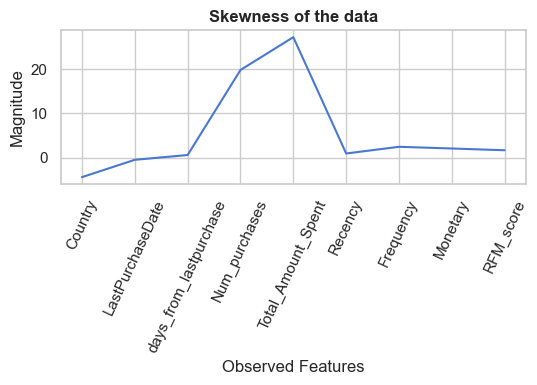

In [158]:
################################################################################################################################
# visually test the skewness of the data
################################################################################################################################
x=RetailDataKMeans.skew()
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
x.plot()
plt.xlabel('Observed Features')
plt.ylabel('Magnitude')
plt.xticks(rotation=65)
plt.title('Skewness of the data',fontweight='bold')
plt.show()

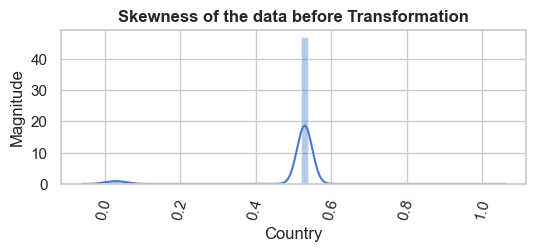

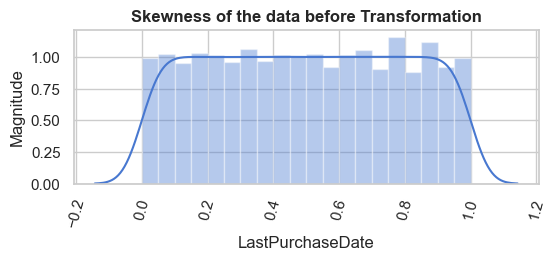

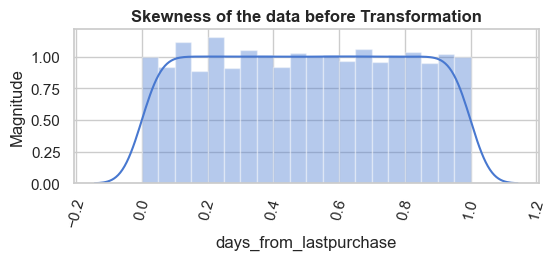

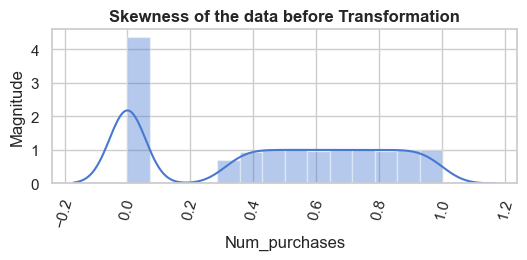

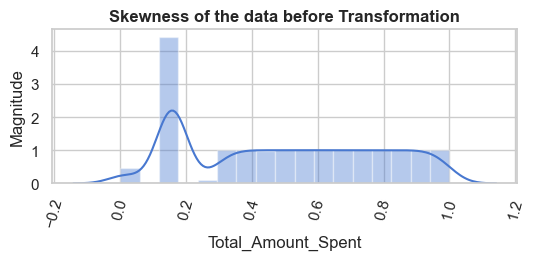

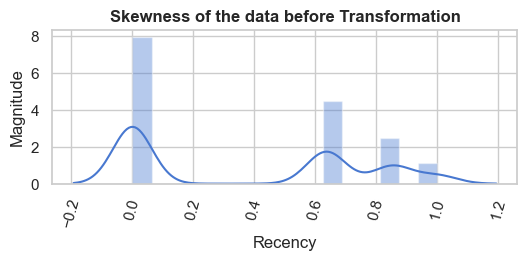

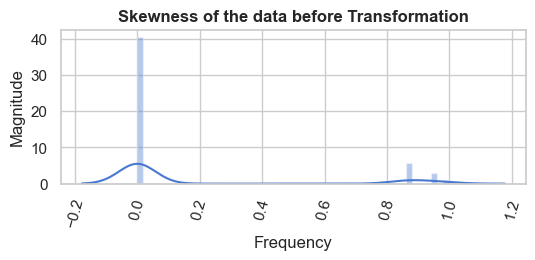

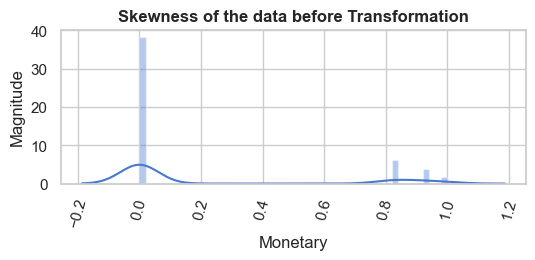

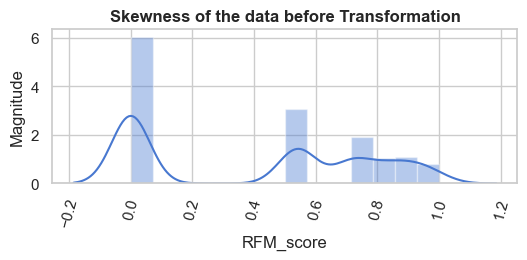

In [144]:
################################################################################################################################
# visually test the skewness of the data in different features
################################################################################################################################
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
for col in RetailDataKMeans.columns:
    if col != 'index':
        d=RetailDataKMeans[col]
        plt.figure(figsize=(6,2))
        sns.distplot(d)
        plt.xlabel(col)
        plt.ylabel('Magnitude')
        plt.xticks(rotation=75)
        plt.title('Skewness of the data before Transformation',fontweight='bold')
        plt.show()


In [99]:
from sklearn.preprocessing import QuantileTransformer, FunctionTransformer, PowerTransformer

In [100]:
qt = QuantileTransformer()
ft = FunctionTransformer(np.log1p)
pt = PowerTransformer()

In [101]:
qtdata = qt.fit_transform(RetailDataKMeans) 
ftdata = ft.fit_transform(RetailDataKMeans)
ptdata = pt.fit_transform(RetailDataKMeans)

In [102]:
################################################################################################################################
# below code is for labeling the xlabel and ylabels of the pairplot
################################################################################################################################
def fun_label(i):
    if i==0:
        k='Country'
    elif i==1:
        k='Last Purchase Date'
    elif i==2:
        k='Days From Last Purchase'
    elif i==3:
        k='Number Of Purchases'
    elif i==4:
        k='Total Amount Spent'
    elif i==5:
        k='Recency'
    elif i==6:
        k='Frequency'
    elif i==7:
        k='Monetary'
    elif i==8:
        k='RFM_score'
    return k

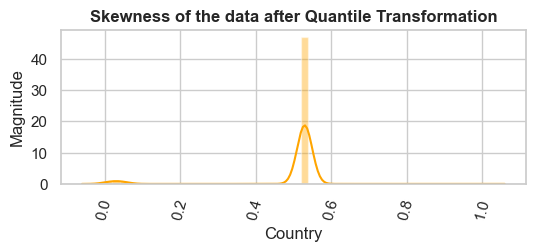

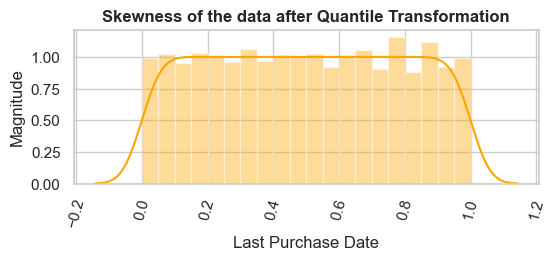

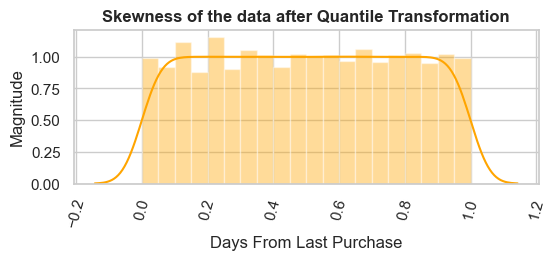

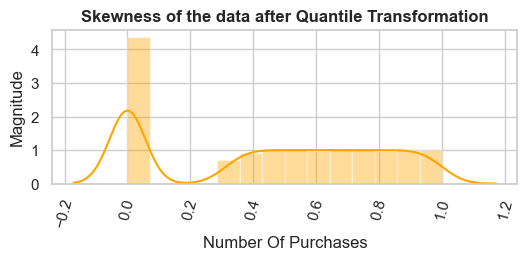

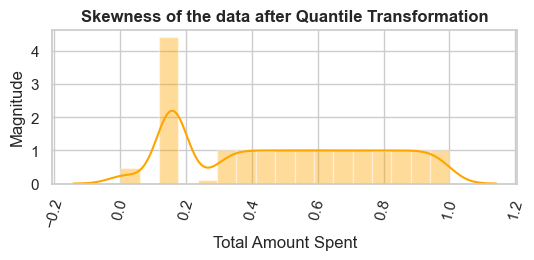

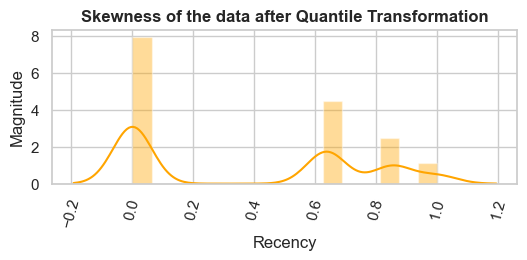

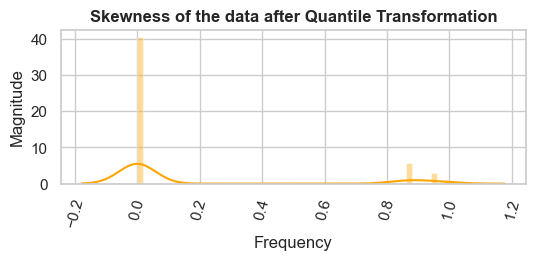

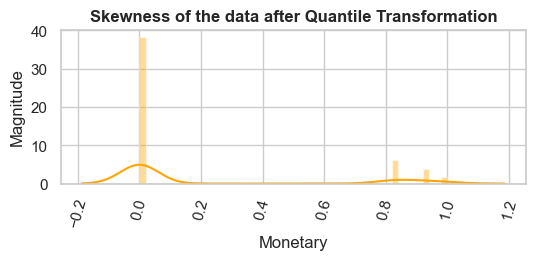

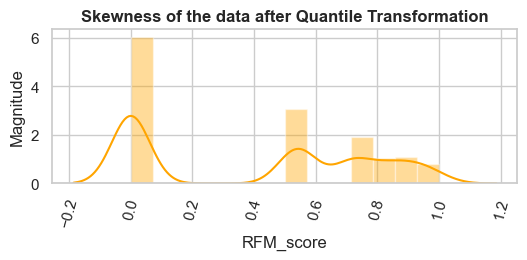

In [145]:
################################################################################################################################
# visually test the skewness of the data after QuantileTransformermation
################################################################################################################################
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
for col in range(qtdata.shape[1]):
        d=qtdata[:,col]
        plt.figure(figsize=(6,2))
        sns.distplot(d,color='orange')
        plt.xlabel(fun_label(col))
        plt.ylabel('Magnitude')
        plt.xticks(rotation=75)
        plt.title('Skewness of the data after Quantile Transformation',fontweight='bold')
        plt.show()


In [104]:
################################################################################################################################
# Take a backup of the file before making the quantile transformation
################################################################################################################################

RetailDataKMeans_bkp = RetailDataKMeans.copy()

In [105]:
################################################################################################################################
# instantiate the minmaxscaler
################################################################################################################################
scaler = MinMaxScaler()

In [106]:
################################################################################################################################
# transform the data through minmax scaler
################################################################################################################################
RetailDataKMeans = qtdata
RetailDataScaled = scaler.fit_transform(RetailDataKMeans)

In [107]:
################################################################################################################################
# import the KMEANS clustering algoritham
################################################################################################################################
from sklearn.cluster import KMeans

In [108]:
################################################################################################################################
# find the optimal number of clusters using 'within group squared distance'
################################################################################################################################
inertia=[]
for i in range(1,11): #1-10
    kmean=KMeans(n_clusters=i,init="k-means++",random_state=4)
    kmean.fit(RetailDataScaled)
    inertia.append(kmean.inertia_)

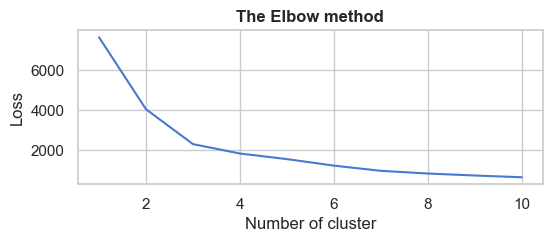

In [143]:
################################################################################################################################
# plot the elbow chart of clusters vs error
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(range(1,11),inertia)
plt.title('The Elbow method',fontweight='bold')
plt.xlabel("Number of cluster")
plt.ylabel("Loss")
plt.show()

In [110]:
printmd('Though Elbow chart says optimal clusters as 2 or 3, we will go with 4')

## <span style="color:#ff6611">Though Elbow chart says optimal clusters as 2 or 3, we will go with 4</span>

In [111]:
################################################################################################################################
# choose optimal cluseters as 4
################################################################################################################################
kmean=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_kmeans=kmean.fit_predict(RetailDataScaled)

In [112]:
################################################################################################################################
# visually look at the clusters for few rows
################################################################################################################################
y_kmeans[0:150]

array([0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 3, 3, 3,
       3, 0, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 2, 3, 0, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 0, 2, 3, 1, 3, 0, 3, 0, 2, 3, 3, 0, 0, 3, 3,
       3, 2, 3, 0, 2, 3, 1, 0, 2, 3, 3, 2, 3, 1, 0, 0, 1, 3, 3, 3, 3, 0,
       3, 0, 3, 2, 3, 2, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 1, 3, 3, 0, 0, 3,
       3, 0, 0, 2, 3, 0, 3, 3, 2, 0, 3, 3, 2, 3, 0, 0, 0, 3])

In [113]:
RetailDataKMeans = pd.DataFrame(RetailDataKMeans,columns=['Country', 'LastPurchaseDate', 'days_from_lastpurchase',
       'Num_purchases', 'Total_Amount_Spent', 'Recency', 'Frequency',
       'Monetary', 'RFM_score'])


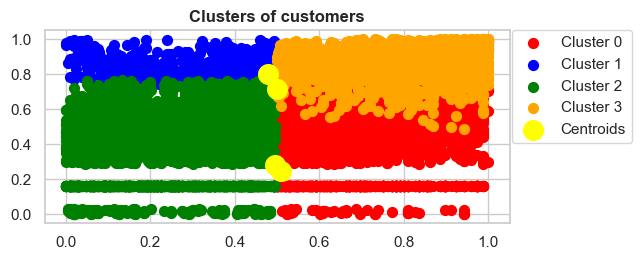

In [114]:
################################################################################################################################
# plot the cluster relationship between Last Purchase Date and Total Amount Spent 
################################################################################################################################
X=RetailDataScaled
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2.5))
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 4], s = 50, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 4], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 4], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 4], s = 50, c = 'orange', label = 'Cluster 3')

plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers',fontweight='bold')

plt.legend(bbox_to_anchor=(0.78, .54, 0.5, 0.5))
plt.show()

In [115]:
printmd('Cluster 3 is spread into areas of cluster 0 & 1; Cluster 2 is fully isolated from other Clusters ')

## <span style="color:#ff6611">Cluster 3 is spread into areas of cluster 0 & 1; Cluster 2 is fully isolated from other Clusters </span>

In [116]:
################################################################################################################################
# create a dataframe of the clusters
################################################################################################################################

ykmeans = pd.DataFrame({'ClusterNo':y_kmeans})

In [117]:
################################################################################################################################
# reset the index for merging/concatenating purpose
################################################################################################################################

RetailDataKMeans = RetailDataKMeans.reset_index()

In [118]:
RetailDataKMeans_bkp.head()

,Country,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score
388829,36,251,60,2,-103.06,2,1,1,4
193449,36,128,206,7,-289.48,1,1,1,3
242446,36,163,164,6,-55.51,1,1,1,3
152709,36,102,242,1,30.00,1,1,1,3
96699,36,60,291,4,-267.93,1,1,1,3


In [119]:
################################################################################################################################
# index was reset for concatenating purpose; original index was kept as a column to set it back as index at later stage
################################################################################################################################

RetailDataKMeans['index'] = RetailDataKMeans_bkp.index
RetailDataKMeans.head()

,index,Country,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score
0,388829,0.53003,0.608609,0.391391,0.324324,0.017008,0.636136,0.0,0.0,0.541542
1,193449,0.53003,0.295295,0.704705,0.391391,0.012150,0.000000,0.0,0.0,0.000000
2,242446,0.53003,0.374875,0.625125,0.379880,0.019706,0.000000,0.0,0.0,0.000000
3,152709,0.53003,0.230230,0.769770,0.000000,0.343743,0.000000,0.0,0.0,0.000000
4,96699,0.53003,0.126126,0.873874,0.356857,0.012725,0.000000,0.0,0.0,0.000000


In [120]:
################################################################################################################################
# concatenate the cluster and observed varaibles data
################################################################################################################################

RetailDataClusters = pd.concat([RetailDataKMeans,ykmeans],ignore_index=False,axis=1)

In [121]:
################################################################################################################################
# set the original index back
################################################################################################################################

RetailDataClusters = RetailDataClusters.set_index('index')

In [122]:
RetailDataClusters.head()

,Country,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score,ClusterNo
index,,,,,,,,,,
388829,0.53003,0.608609,0.391391,0.324324,0.017008,0.636136,0.0,0.0,0.541542,0
193449,0.53003,0.295295,0.704705,0.391391,0.012150,0.000000,0.0,0.0,0.000000,2
242446,0.53003,0.374875,0.625125,0.379880,0.019706,0.000000,0.0,0.0,0.000000,2
152709,0.53003,0.230230,0.769770,0.000000,0.343743,0.000000,0.0,0.0,0.000000,2
96699,0.53003,0.126126,0.873874,0.356857,0.012725,0.000000,0.0,0.0,0.000000,2


In [123]:
################################################################################################################################
# retain only clusters column and delete rest
################################################################################################################################

RetailDataClusters = RetailDataClusters[['ClusterNo']]

In [124]:
################################################################################################################################
# now merge the clusters with original Master data file
################################################################################################################################

RetailDataFull = pd.concat([RetailData,RetailDataClusters],axis=1)

In [125]:
################################################################################################################################
# check if it has merged properly through shapes
################################################################################################################################

RetailDataFull.shape, RetailData.shape

((536660, 19), (536660, 18))

In [126]:
################################################################################################################################
# transform/populate the cluster number on to every row with the cluster number of the customerID of those rows
################################################################################################################################

RetailDataFull['ClusterNo'] = RetailDataFull.groupby('CustomerID').ClusterNo.transform('max')

In [127]:
################################################################################################################################
# convert the cluster number to integer
################################################################################################################################

RetailDataFull['ClusterNo'] = RetailDataFull['ClusterNo'].map(lambda x: int(x))

In [128]:
################################################################################################################################
# look at sample 25 samples of each cluster 0
################################################################################################################################
printmd('Cluster 0 Samples')
RetailDataFull[RetailDataFull['ClusterNo']==0].iloc[:,6:].sample(25)


## <span style="color:#ff6611">Cluster 0 Samples</span>

,CustomerID,Country,InvoiceDate_only,Amount,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score,ClusterNo
117928,16768,United Kingdom,2011-03-13,15.90,2011-10-23,47,58,458.04,2,1,1,4,0
241854,14167,United Kingdom,2011-06-27,8.50,2011-10-31,39,50,562.59,2,1,1,4,0
520699,13780,United Kingdom,2011-12-02,4.68,2011-12-02,7,57,360.01,3,1,1,5,0
271536,17229,United Kingdom,2011-07-20,3.75,2011-09-04,96,47,318.76,2,1,1,4,0
419522,15568,United Kingdom,2011-10-26,10.08,2011-12-07,2,53,758.29,4,1,1,6,0
155073,13122,United Kingdom,2011-04-13,17.70,2011-09-06,94,55,922.39,2,1,1,4,0
344431,16108,United Kingdom,2011-09-16,19.80,2011-09-16,84,49,816.10,2,1,1,4,0
379219,16803,United Kingdom,2011-10-05,17.40,2011-10-05,65,24,332.30,2,1,1,4,0
199958,12710,Germany,2011-05-22,19.80,2011-09-04,96,79,1130.57,2,1,1,4,0
388393,13352,United Kingdom,2011-10-10,15.30,2011-12-02,7,27,389.28,3,1,1,5,0


In [129]:
################################################################################################################################
# look at sample 25 samples of each cluster 1
################################################################################################################################
printmd('Cluster 1 Samples')
RetailDataFull[RetailDataFull['ClusterNo']==1].iloc[:,6:].sample(25)

## <span style="color:#ff6611">Cluster 1 Samples</span>

,CustomerID,Country,InvoiceDate_only,Amount,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score,ClusterNo
294188,13869,United Kingdom,2011-08-08,1.68,2011-08-08,123,304,3083.65,1,3,3,7,1
194768,13659,United Kingdom,2011-05-18,13.44,2011-05-26,197,107,1540.65,1,2,2,5,1
288728,16324,United Kingdom,2011-08-03,1.65,2011-08-03,128,111,408.59,1,2,1,4,1
17890,17341,United Kingdom,2010-12-08,2.95,2011-07-06,156,157,682.29,1,2,1,4,1
251425,20423,United Kingdom,2011-07-05,4.96,2011-07-05,157,464,4178.58,1,4,3,8,1
316533,20848,United Kingdom,2011-08-30,2.46,2011-08-30,101,266,2026.73,1,3,2,6,1
216568,16550,United Kingdom,2011-06-07,22.50,2011-08-23,108,261,2266.25,1,3,2,6,1
128222,19205,United Kingdom,2011-03-22,4.58,2011-03-22,262,153,1940.13,1,2,2,5,1
88527,17085,United Kingdom,2011-02-13,6.30,2011-08-08,123,188,1550.80,1,2,2,5,1
36887,18533,United Kingdom,2010-12-17,4.21,2010-12-17,357,458,5022.16,1,4,3,8,1


In [130]:
################################################################################################################################
# look at sample 25 samples of each cluster 2
################################################################################################################################
printmd('Cluster 2 Samples')
RetailDataFull[RetailDataFull['ClusterNo']==2].iloc[:,6:].sample(25)

## <span style="color:#ff6611">Cluster 2 Samples</span>

,CustomerID,Country,InvoiceDate_only,Amount,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score,ClusterNo
43544,13253,United Kingdom,2011-01-04,15.00,2011-07-06,156,36,1030.40,1,1,1,3,2
44732,18629,United Kingdom,2011-01-05,5.06,2011-01-05,338,91,583.37,1,1,1,3,2
75440,14532,United Kingdom,2011-01-30,15.90,2011-04-17,236,64,932.85,1,1,1,3,2
304369,15541,United Kingdom,2011-08-17,2.08,2011-08-17,114,29,85.13,1,1,1,3,2
2102,18299,United Kingdom,2010-12-01,99.75,2010-12-01,373,1,99.75,1,1,1,3,2
232419,15076,United Kingdom,2011-06-20,50.40,2011-06-20,172,49,880.85,1,1,1,3,2
58494,15535,United Kingdom,2011-01-16,4.20,2011-06-19,173,75,426.40,1,1,1,3,2
52317,17742,United Kingdom,2011-01-11,23.60,2011-08-18,113,15,355.11,1,1,1,3,2
217913,16955,United Kingdom,2011-06-08,15.90,2011-06-08,184,26,493.67,1,1,1,3,2
297467,14346,United Kingdom,2011-08-11,13.00,2011-08-11,120,60,1021.58,1,1,1,3,2


In [131]:
################################################################################################################################
# look at sample 25 samples of each cluster 3
################################################################################################################################
printmd('Cluster 3 Samples')
RetailDataFull[RetailDataFull['ClusterNo']==3].iloc[:,6:].sample(25)

## <span style="color:#ff6611">Cluster 3 Samples</span>

,CustomerID,Country,InvoiceDate_only,Amount,LastPurchaseDate,days_from_lastpurchase,Num_purchases,Total_Amount_Spent,Recency,Frequency,Monetary,RFM_score,ClusterNo
496651,21816,United Kingdom,2011-11-24,6.58,2011-11-24,15,606,5526.53,3,4,4,11,3
293456,12865,Austria,2011-08-08,19.80,2011-11-13,26,96,1548.07,2,1,2,5,3
495697,15398,United Kingdom,2011-11-23,15.00,2011-11-23,16,74,1339.63,3,1,2,6,3
533518,17049,United Kingdom,2011-12-07,20.80,2011-12-07,2,321,5589.83,4,3,4,11,3
183801,16710,United Kingdom,2011-05-10,11.80,2011-11-20,19,394,2467.99,3,3,3,9,3
406987,17625,United Kingdom,2011-10-19,12.45,2011-11-21,18,306,2020.40,3,3,2,8,3
345915,13334,United Kingdom,2011-09-18,7.50,2011-09-18,82,265,3502.32,2,3,3,8,3
86828,15570,United Kingdom,2011-02-10,2.95,2011-12-02,7,326,4093.27,3,3,3,9,3
121014,16985,United Kingdom,2011-03-16,67.60,2011-11-22,17,121,5461.62,3,2,3,8,3
122145,13268,United Kingdom,2011-03-17,8.50,2011-11-22,17,440,3127.70,3,3,3,9,3


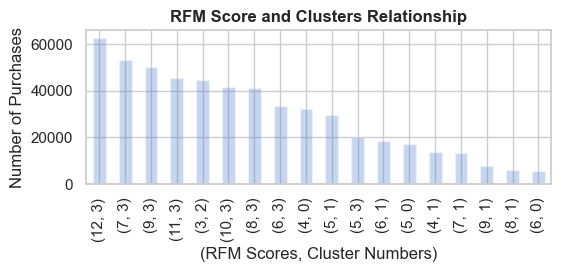

In [141]:
################################################################################################################################
# Plot the clusters by value of RFM Score
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
RetailDataFull[['RFM_score','ClusterNo']].value_counts().plot(kind='bar',alpha=.3)
plt.ylabel('Number of Purchases')
plt.title('RFM Score and Clusters Relationship',fontweight='bold')
plt.xlabel('(RFM Scores, Cluster Numbers)')
plt.show()

In [133]:
################################################################################################################################
# look at value counts of clusters 
################################################################################################################################

RetailDataFull.ClusterNo.value_counts()

3    347963
1     88898
0     55407
2     44392
Name: ClusterNo, dtype: int64

In [134]:
################################################################################################################################
# look at the key total details of different clusters 
################################################################################################################################

RetailDataFull.groupby('ClusterNo').mean()[['Total_Amount_Spent','Num_purchases','Recency','Frequency','Monetary','RFM_score']]

,Total_Amount_Spent,Num_purchases,Recency,Frequency,Monetary,RFM_score
ClusterNo,,,,,,
0,595.789154,49.058873,2.518364,1.003646,1.000108,4.522118
1,2854.552793,261.059439,1.000000,2.530079,2.377579,5.907658
2,464.315511,39.459858,1.000000,1.000000,1.000000,3.000000
3,13182.869865,799.164747,3.089734,2.923791,2.962028,8.975552


In [137]:
printmd('Clusters look balanced to some extent')
printmd('Clusters have been formed to great extent based on RFM Scores')
printmd('Cluster 3 has all high RFM scores, 7 and above')
printmd('Cluster 0 has scores of 4, 5 and 6')
printmd('Cluster 1 has RFM scores 4 thru 9, mostly 7, 8 and 9')
printmd('Cluster 2 has RFM scores 3 only, and no other cluster has RFM scores of 3')
printmd('Only Cluster 3 has RFM scores of 10, 11 and 12')
printmd('Cluster 3 is overlapping with clusters 0 and 1 w.r.t. RFM scores')
printmd('Cluster 2 is completely isolated from other Clusters w.r.t. RFM scores.')


## <span style="color:#ff6611">Clusters look balanced to some extent</span>

## <span style="color:#ff6611">Clusters have been formed to great extent based on RFM Scores</span>

## <span style="color:#ff6611">Cluster 3 has all high RFM scores, 7 and above</span>

## <span style="color:#ff6611">Cluster 0 has scores of 4, 5 and 6</span>

## <span style="color:#ff6611">Cluster 1 has RFM scores 4 thru 9, mostly 7, 8 and 9</span>

## <span style="color:#ff6611">Cluster 2 has RFM scores 3 only, and no other cluster has RFM scores of 3</span>

## <span style="color:#ff6611">Only Cluster 3 has RFM scores of 10, 11 and 12</span>

## <span style="color:#ff6611">Cluster 3 is overlapping with clusters 0 and 1 w.r.t. RFM scores</span>

## <span style="color:#ff6611">Cluster 2 is completely isolated from other Clusters w.r.t. RFM scores.</span>

## <span style="color:#ff6611">Below chart fully summarizes the above findings.</span>

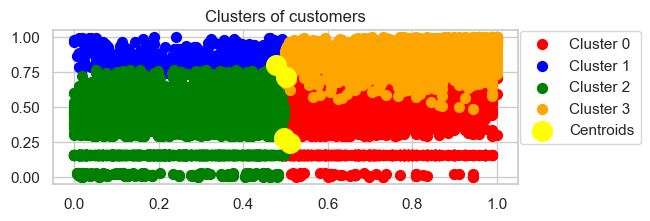

In [142]:
################################################################################################################################
# plot the cluster relationship between Last Purchase Date and Total Amount Spent 
################################################################################################################################
printmd('Below chart fully summarizes the above findings.')
X=RetailDataScaled
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 4], s = 50, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 4], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 4], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 4], s = 50, c = 'orange', label = 'Cluster 3')

plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')

plt.legend(bbox_to_anchor=(0.78, .54, 0.5, 0.5))
plt.show()